# Importing libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import warnings

# Dataframe variable saving

In [38]:
life_expectancy = 'life_expectancy.xls'



# Dropping useless lines, resetting index and header 

In [39]:
df_sheet1 = pd.read_excel(life_expectancy, sheet_name='Data')
df_sheet1 = df_sheet1.drop([0,1])
df_sheet1.reset_index(drop=True, inplace=True)
df_sheet1.columns = df_sheet1.iloc[0]
df_sheet1 = df_sheet1[1:]
df_sheet2 = pd.read_excel(life_expectancy, sheet_name='Data (2)')
df_sheet2.columns = df_sheet1.columns

In [40]:
# Testing
df_sheet1.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
1,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Putting all the data together creating the main DataFrame

In [41]:
df_data = pd.concat([df_sheet1, df_sheet2], ignore_index=True)

In [42]:
# Testing
df_data.tail()


,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
67559,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67560,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67561,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67562,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67563,Zimbabwe,ZWE,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creating a new Dimension Table focusing on life expectancy data for each country (male, female and general) per year

In [43]:
df_fil = df_data[(df_data['Indicator Code'] == 'SP.DYN.LE00.MA.IN') | 
                 (df_data['Indicator Code'] == 'SP.DYN.LE00.IN') | 
                 (df_data['Indicator Code'] == 'SP.DYN.LE00.FE.IN')].copy() 
df_fil = df_fil.loc[:, : 2021.0]
df_fil.reset_index(drop=True, inplace=True)

In [44]:
# Testing
df_fil.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,60.582000,60.88000,61.023000,61.372000,61.522000,61.686000,...,72.346000,72.361000,72.448000,72.569000,72.582000,72.838000,73.096000,73.286000,72.828000,71.798000
1,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.53700,64.752000,65.132000,65.294000,65.502000,...,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000
2,Aruba,ABW,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,67.783000,68.26900,68.579000,68.992000,69.180000,69.449000,...,78.603000,78.803000,78.614000,78.644000,78.486000,78.794000,78.854000,79.010000,78.445000,77.315000
3,Africa Eastern and Southern,AFE,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,42.543163,42.74292,43.113427,43.157766,43.705056,43.682689,...,57.929714,58.471704,59.028143,59.517464,60.021249,60.535839,60.905186,61.290721,60.817484,59.894509


# Creating a new Dimension Table containing the global average per indicator.

In [45]:
global_mean = df_data.groupby('Indicator Name').mean(numeric_only=True)
global_mean['Country Name'] = 'Global'
global_mean['Country Code'] = 'GLO'
global_mean['Indicator Code'] = df_data.groupby('Indicator Name')['Indicator Code'].first().values
global_mean.reset_index(inplace=True)
cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [col for col in global_mean.columns if col not in ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']]
global_mean = global_mean[cols]

In [46]:
# Testing
global_mean.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,Global,GLO,ARI treatment (% of children under 5 taken to ...,SH.STA.ARIC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.143750,51.333333,64.255000,56.281818,57.467128,61.755556,74.712500,70.800000,NaN,NaN
1,Global,GLO,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,102.162997,101.289211,101.073033,100.37925,99.067413,98.631924,...,51.347791,49.752921,48.204061,46.798694,45.742011,44.889917,43.903008,43.265416,NaN,NaN
2,Global,GLO,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,25652.089552,25190.820896,24033.805970,22775.746269,22166.119403,21047.819549,19583.712121,19258.778626,NaN,NaN


# Classes for ploting using the names of the indicators 

In [47]:
class timeploting_Global():
    def __init__(self, country, actionlist, plotname, plottype):
        self.country = country
        self.df_countryfilter = global_mean[global_mean["Country Name"] == self.country]
        self.df_countryfilter.reset_index(drop=True, inplace=True)
        self.df_countryfilter = self.df_countryfilter.drop(columns=["Country Name", "Country Code", "Indicator Code"], axis=1)
        self.df_actionfilter = self.df_countryfilter[self.df_countryfilter["Indicator Name"].isin(actionlist)]
        self.melted = self.df_actionfilter.melt(id_vars='Indicator Name', var_name='Year', value_name='Quantity')

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=self.melted, x='Year', y='Quantity', hue='Indicator Name', marker='o')

        plt.title(f'{plotname}, 1960/2021 period')
        plt.xlabel('Year')
        if plottype == 'Numeric':
            plt.ylabel('Age')
        elif plottype == 'Percentage':
            plt.ylabel('Percentage')
        else:
            raise ('Incorrect plot type. Only values "Numeric" or "Percentage" are accepted')


        plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        plt.gca().ticklabel_format(style='plain', axis='y')

        plt.grid(True)
        plt.show()

class timeploting_Country():
    def __init__(self, country, actionlist, plotname, plottype):
        self.country = country
        self.df_countryfilter = df_data[df_data["Country Name"] == self.country]
        self.df_countryfilter.reset_index(drop=True, inplace=True)
        self.df_countryfilter = self.df_countryfilter.drop(columns=["Country Name", "Country Code", "Indicator Code"], axis=1)
        self.df_actionfilter = self.df_countryfilter[self.df_countryfilter["Indicator Name"].isin(actionlist)]
        self.melted = self.df_actionfilter.melt(id_vars='Indicator Name', var_name='Year', value_name='Quantity')

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=self.melted, x='Year', y='Quantity', hue='Indicator Name', marker='o')

        plt.title(f'{plotname}, 1960/2021 period')
        plt.xlabel('Year')
        if plottype == 'Numeric':
            plt.ylabel('Age')
        elif plottype == 'Percentage':
            plt.ylabel('Percentage')
        else:
            raise ('Incorrect plot type. Only values "Numeric" or "Percentage" are accepted')


        plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        plt.gca().ticklabel_format(style='plain', axis='y')

        plt.grid(True)
        plt.show()

# Creating class to compare countries

In [48]:
class comparisonplotting():
    def __init__(self, indicator, countrylist, year, chartype, chartname):
        self.indicator = indicator
        self.df_indicatorfilter = df_fil[df_fil["Indicator Name"] == self.indicator]
        self.df_countryfilter = self.df_indicatorfilter[self.df_indicatorfilter["Country Name"].isin(countrylist)]
        self.df_countryfilter = self.df_countryfilter[['Country Name', 'Indicator Name', year]]

        plt.figure(figsize=(12, 6))
        plt.bar(self.df_countryfilter['Country Name'], self.df_countryfilter[year])


        plt.xlabel('Countries')
        if chartype == 'Numeric':
            plt.ylabel(f'Quantity in year {int(year)}')
        elif chartype == 'Percentage':
            plt.ylabel(f'Percentage in year {int(year)}')
        else:
            raise ('Chart type not defined, please use "Numeric" or "Percentage"')

        plt.title(f'{chartname}, year: {int(year)}')
        plt.grid(True, axis='y')
        plt.show()

In [49]:
action_list_1 = ['Life expectancy at birth, total (years)'] 
action_list_2 = ['Life expectancy at birth, male (years)',
                 'Life expectancy at birth, female (years)',
]
action_list_3 = ['Survival to age 65, male (% of cohort)',
                 'Survival to age 65, female (% of cohort)',
]
action_list_4 = ['Birth rate, crude (per 1,000 people)']
action_list_5 = ['Birth rate, crude (per 1,000 people)']


action_list_6 = ['Population ages 0-14 (% of total population)',
                 'Population ages 15-64 (% of total population)',
                 'Population ages 65 and above (% of total population)',
]
action_list_7 = ['Population ages 0-14 (% of total population)',
                 'Population ages 15-64 (% of total population)',
                 'Population ages 65 and above (% of total population)',
]

# Plotting

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


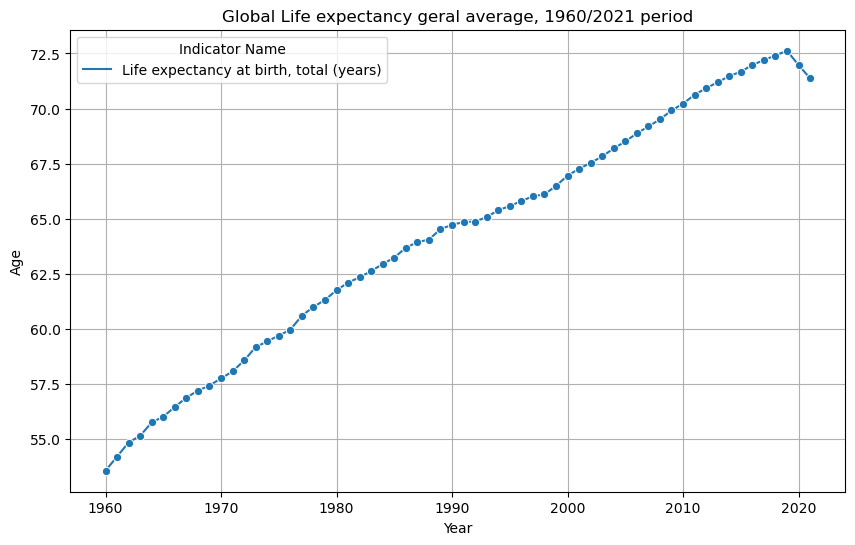

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


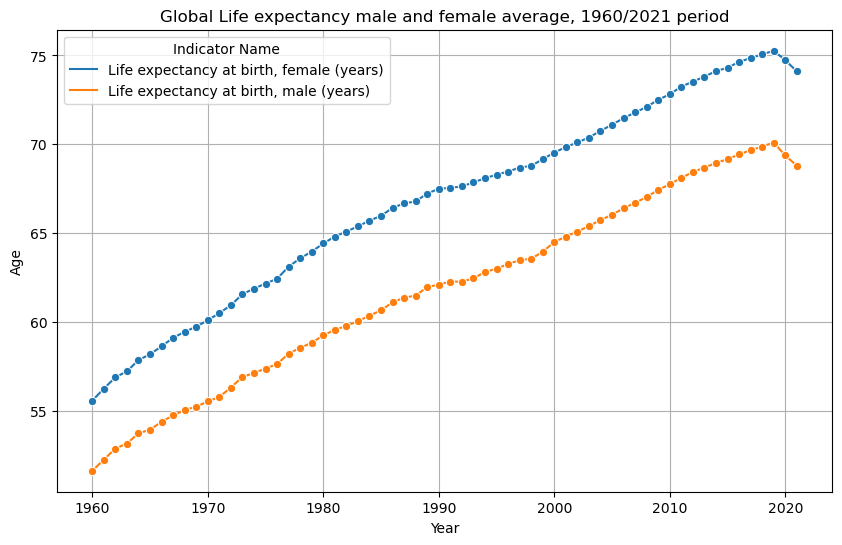

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


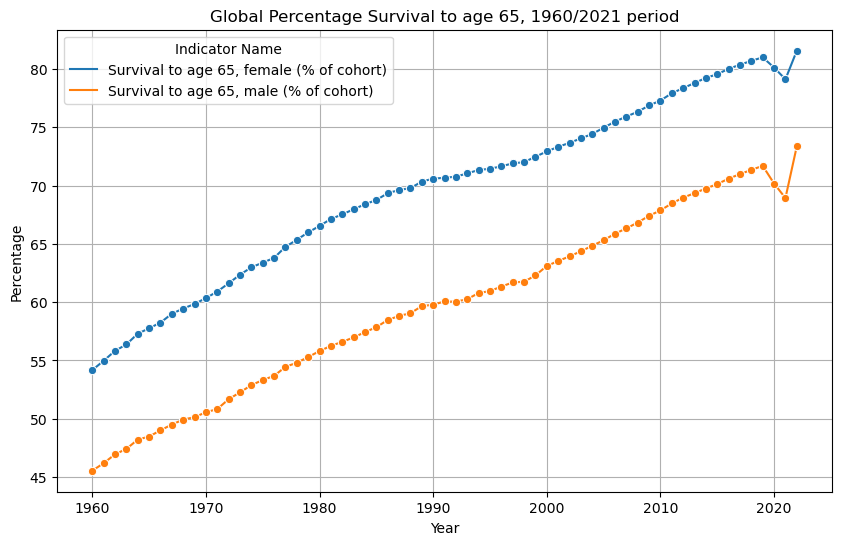

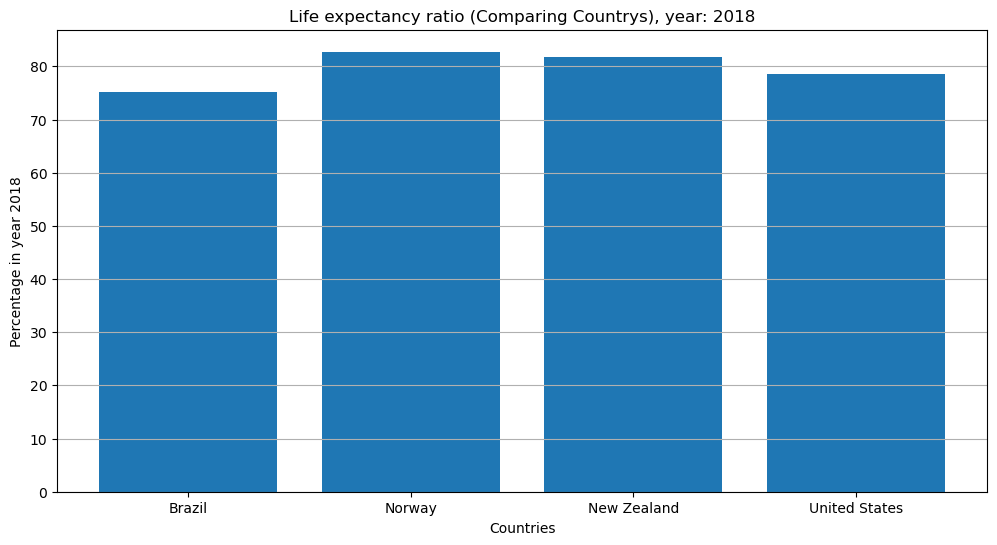

In [51]:
timegraph1 = timeploting_Global('Global', action_list_1, 'Global Life expectancy geral average', 'Numeric')
timegraph2 = timeploting_Global('Global', action_list_2, 'Global Life expectancy male and female average', 'Numeric')
timegraph3 = timeploting_Global('Global', action_list_3, 'Global Percentage Survival to age 65', 'Percentage')
countries_1 = ['Brazil', 'United States', 'New Zealand', 'Norway']
year = 2018
compgraph_1 = comparisonplotting('Life expectancy at birth, total (years)', countries_1, float(year), "Percentage", 'Life expectancy ratio (Comparing Countrys)')


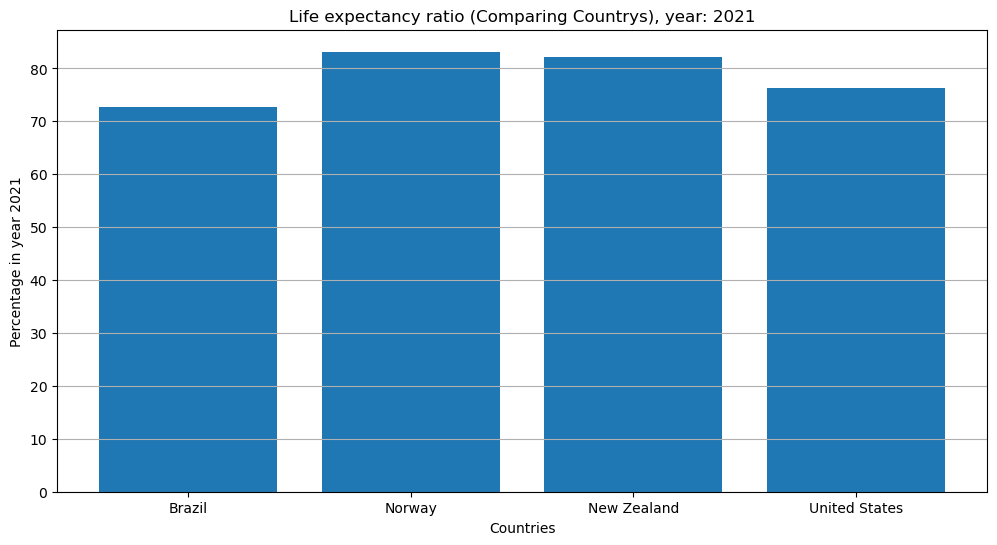

In [52]:
countries_2 = ['Brazil', 'United States', 'New Zealand', 'Norway']
year = 2021
compgraph_2 = comparisonplotting('Life expectancy at birth, total (years)', countries_2, float(year), "Percentage", 'Life expectancy ratio (Comparing Countrys)')


C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


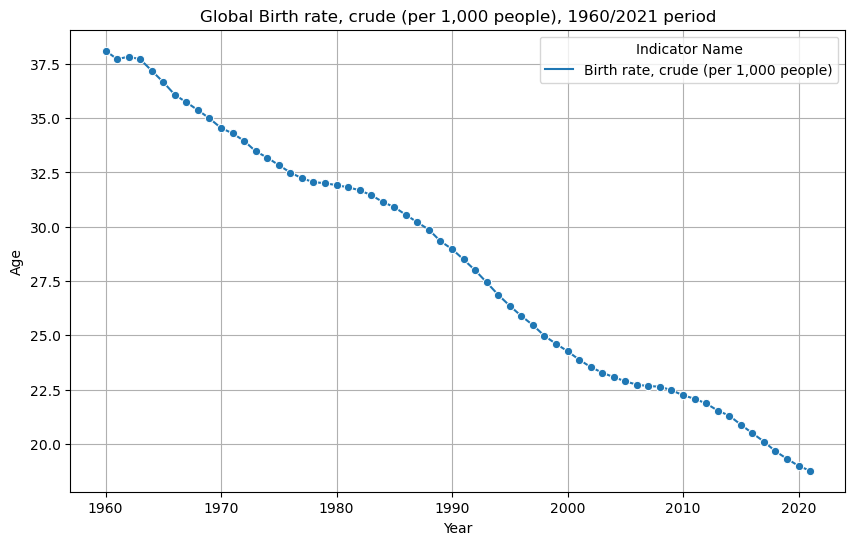

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


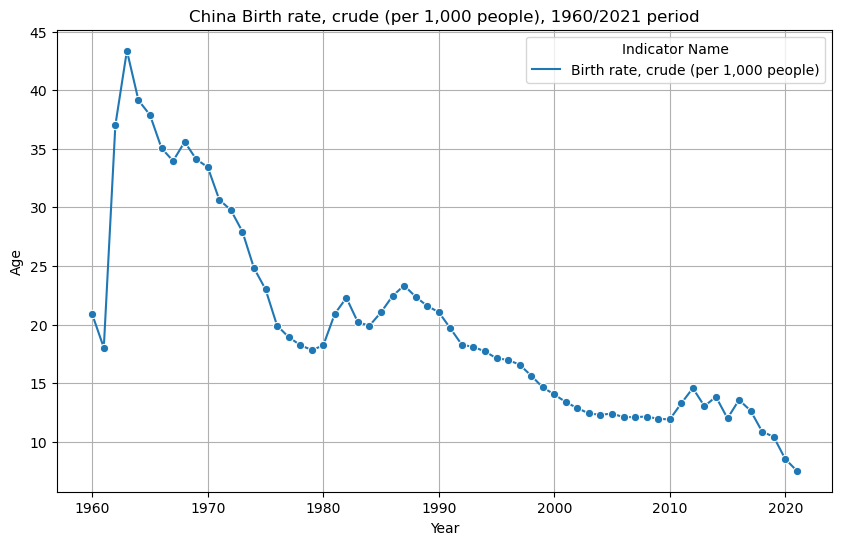

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


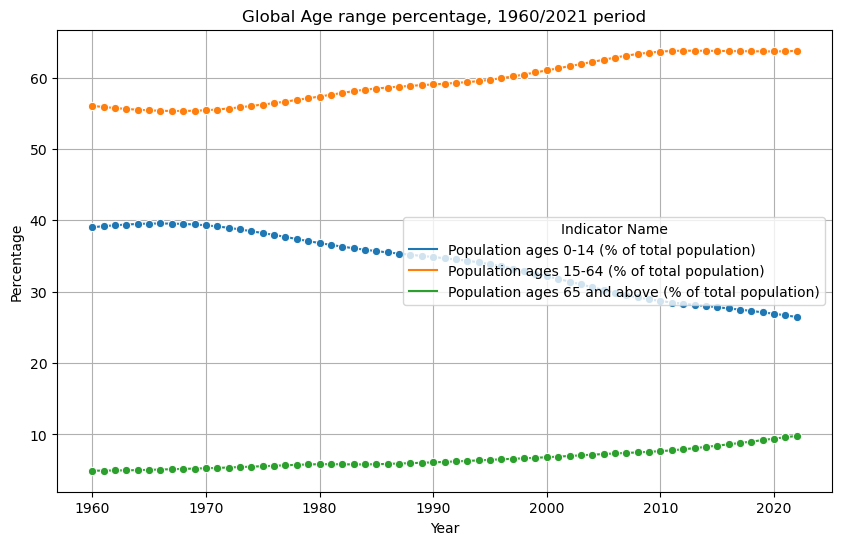

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


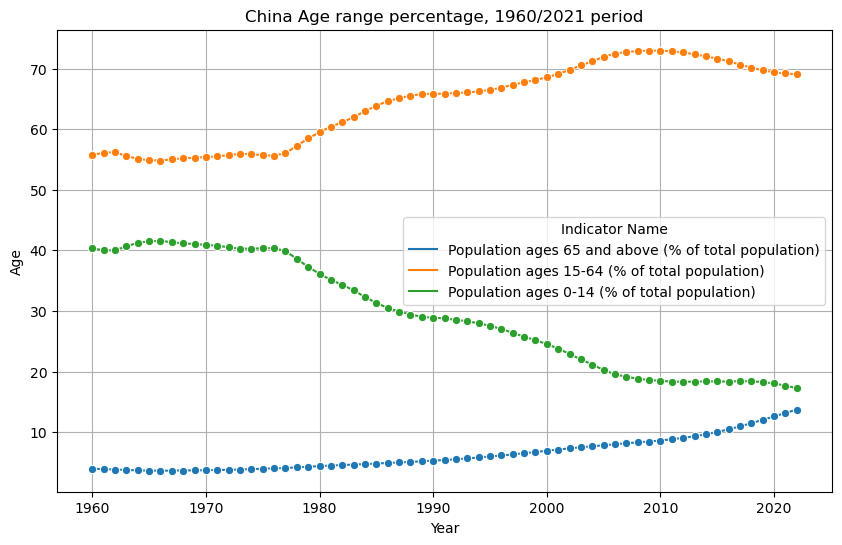

In [53]:
timegraph4 = timeploting_Global('Global', action_list_4, 'Global Birth rate, crude (per 1,000 people)', 'Numeric')
timegraph5 = timeploting_Country('China', action_list_5, 'China Birth rate, crude (per 1,000 people)', 'Numeric')

timegraph6 = timeploting_Global('Global', action_list_6, 'Global Age range percentage', 'Percentage')
timegraph7 = timeploting_Country('China', action_list_7, 'China Age range percentage', 'Numeric')